This file will contain my first attempt at multiclass classification problem for cartoon faces
Here we import the necessary packages

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import dlib
from sklearn.model_selection import train_test_split
from sklearn import svm
from keras.preprocessing import image
from sklearn import decomposition
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import metrics
from skimage.color import rgb2gray
from skimage.feature import hog
import matplotlib.pyplot as plt
import matplotlib.image as mapimg
import pickle

In [2]:
file_path = "D:\Admin\Documents\Year_4\AMLS\Assessment\dataset_AMLS_20-21\cartoon_set\img"
labels_path = "D:\Admin\Documents\Year_4\AMLS\Assessment\dataset_AMLS_20-21\cartoon_set\labels.csv"

In [3]:
df = pd.read_csv(labels_path)

df = df.drop(columns="Unnamed: 0")
temp = df["file_name"]
df.insert(loc=0, column="file_names", value=temp)
df = df.drop(columns="file_name")
df = df.drop(df.index[1000:])

In [4]:
train, validation, test = \
              np.split(df.sample(frac=1), 
                       [int(.6*len(df)), int(.8*len(df))])

In [5]:
def shape_to_np(shape, dtype="int"):
    coords = np.zeros((shape.num_parts, 2), dtype=dtype)
    for i in range(0, shape.num_parts):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    return coords

In [6]:
def rect_to_dim(rect):
    w = rect.right() - rect.left()
    h = rect.top() - rect.bottom()
    return (w, h)

In [7]:
def create_feature(img):
    face_detect = dlib.get_frontal_face_detector()
    shape_predict = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = gray.astype('uint8')
    rects = face_detect(gray, 1)
    num_faces = len(rects)
    
    if num_faces == 0:
        return None

    face_areas = np.zeros((1, num_faces))
    face_shapes = np.zeros((136, num_faces), dtype=np.int64)
    
    for (i, rect) in enumerate(rects):
        temp_shape = shape_predict(gray, rect)
        temp_shape = shape_to_np(temp_shape)
        (w, h) = rect_to_dim(rect)
        face_shapes[:, i] = np.reshape(temp_shape, [136])
        face_areas[0, i] = w * h
        dlibout = np.reshape(np.transpose(face_shapes[:, np.argmax(face_areas)]), [68, 2])
    return dlibout

In [8]:
def create_feature_matrix(file_path, train_df):
    features = []
    labels = []
    for file_name in train_df["file_names"]:
        img_path = os.path.join(file_path, file_name)
        img = cv2.imread(img_path, 0)
        feature = hog(img, pixels_per_cell=(6,6))
        if feature is not None:
            features.append(feature)
            temp = file_name.split(".")[0]
            labels.append(train_df.loc[int(temp), "face_shape"])
    features = np.array(features)
    return features, labels

In [9]:
train_x, train_y = create_feature_matrix(file_path, train)

In [10]:
train_y = np.array(train_y)

In [11]:
print(train_x.shape)

(600, 531441)


Here we split the data to test and train.

In [12]:
classifier = svm.SVC(kernel='poly', degree=3, C=1.0)

In [13]:
classifier.fit(train_x, train_y)

SVC(kernel='poly')

y_pred = classifier.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred=y_pred)
print(accuracy)

In [14]:
valid_x, valid_y = create_feature_matrix(file_path, validation)

Here we split the data to test and train.

In [15]:
y_pred = classifier.predict(valid_x)
accuracy = metrics.accuracy_score(valid_y, y_pred=y_pred)
print(accuracy)

1.0


In [16]:
test_file_path = "D:\Admin\Documents\Year_4\AMLS\Assessment\dataset_AMLS_20-21\cartoon_set_test\img"
test_labels_path = "D:\Admin\Documents\Year_4\AMLS\Assessment\dataset_AMLS_20-21\cartoon_set_test\labels.csv"

In [19]:
test_df = pd.read_csv(test_labels_path, sep="\t")

test_df = test_df.drop(columns="Unnamed: 0")
temp = test_df["file_name"]
test_df.insert(loc=0, column="file_names", value=temp)
test_df = test_df.drop(columns="file_name")

In [20]:
test_x, test_y = create_feature_matrix(test_file_path, test_df)

In [22]:
test_pred = classifier.predict(test_x)
test_accuracy = metric.accuracy_score(test_y, y_pred=test_pred)
print(test_accuracy)

NameError: name 'metric' is not defined

In [23]:
test_accuracy = metrics.accuracy_score(test_y, y_pred=test_pred)
print(test_accuracy)

0.9912


In [25]:
model_name = "FaceShape_SVM.sav"

In [26]:
pickle.dump(classifier, open(model_name, "wb"))

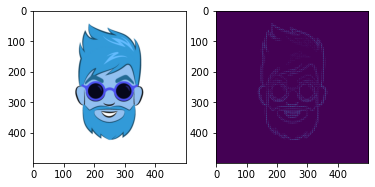

In [29]:
img = cv2.imread(os.path.join(file_path, "0.png"))
feature, hog_img = hog(img, pixels_per_cell=(6,6), visualize=True)
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(hog_img)